In [ ]:
"""
含义
在 NumPy 中,随机漫步(Random Walk)是一种数学概念的实现。
随机漫步是指在一个序列中，每一步的值都是基于前一步的值加上一个随机的增量。

"""

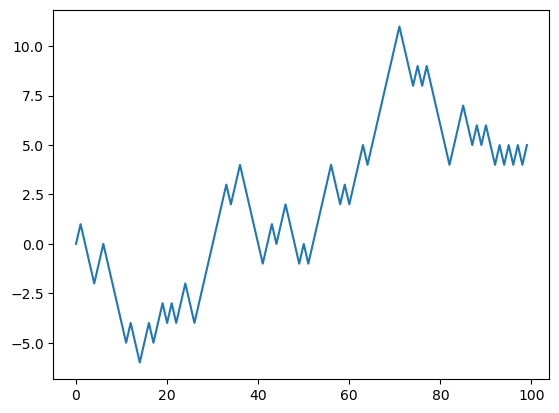

In [5]:
#纯python实现1000步的随机漫步,步进1和-1概率相等:

import numpy as np
import matplotlib.pyplot as plt

#通过内置的random模块
import random
position=0
walk=[position]
nsteps=1000
for _ in range(nsteps):
    #random.randint(0,1)是指1(true)和0(false)随机得到一个作为条件
    step= 1 if random.randint(0,1) else -1
    position+=step
    walk.append(position)

#可视化前100步过程

plt.plot(walk[:100])

"""
不难看出walk就是每一步的累加和
"""

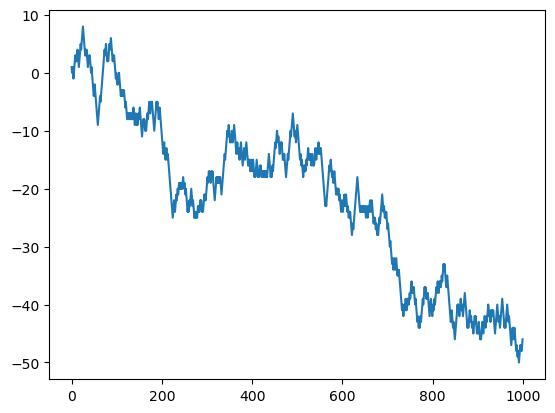

In [ ]:
#不难看出walk列表就是每一步的累加和,因此使用数组可以实现这个过程

#步数:
nsteps=1000

#构建布尔索引,来判断步的值:
#使用integers(使他从0到1随机选取整数),注意终止位置不会选取,所以不是integers(0,1)
rng=np.random.default_rng(seed=12345)
rand=rng.integers(0,2,(1000))#或者size=1000

#使用where函数来构建steps数组(1000步中每一步的数组)
steps=np.where(rand==1,1,-1)

#使用np.cumsum()求每一步的累加和
walk=np.cumsum(steps)

#可视化这个累加和数组walk
import matplotlib.pyplot as plt
plt.plot(walk)

In [20]:
#有了这些数据我们可以做统计工作,比如求漫步过程的最大值,和最小值

mini=walk.min()
max=walk.max()
print(mini,max)

-50 8


In [21]:
"""
更复杂的统计任务:穿越时间 即漫步过程中第一次到达某一特定值时的时间
假设我想知道第一次到达距离原点25的步数(时间)

使用通用函数np.abs()逐一元素的算取数组内的绝对值,
argmax()返回数组内的最大值的第一索引,那布尔数组的最大值为1
"""
(np.abs(walk)>=25).argmax()#说明224步第一次到达

np.int64(224)

In [25]:
#一次模拟多个随机漫步:
#只需要将布尔数组改为2维的数组,这样布尔数组的每一行都是一个漫步过程的布尔索引

nsteps=1000
count=10


#创建布尔索引
rng=np.random.default_rng(seed=12345)
cond=rng.integers(0,2,size=(10,1000))

#判断每一步的值steps
steps=np.where(cond,1,-1)

#累积和
walks=steps.cumsum(1)#将每一行的步数逐步累加
walks

array([[  1,   0,   1, ..., -48, -47, -46],
       [  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       ...,
       [ -1,   0,  -1, ...,  22,  23,  24],
       [ -1,   0,  -1, ..., -36, -37, -36],
       [  1,   2,   3, ...,  10,   9,   8]], shape=(10, 1000))

In [26]:
#得到这些数据依旧可以进行数据统计
#求最值
a=walks.max()
b=walks.min()
print(a,b)

58 -73


In [36]:
"""
统计这个10个漫步中第一次达到正30的时间,但注意不是每一个漫步过程都达到了30所以先要确认是否达到过30

布尔型数组的方法:any查看一个数组是不是有一个或多个true

"""
#统计到达30的行,即每一次漫步
cond=(walks>=30).any(axis=1)

#计算 到达过30的漫步数量
count_30=cond.sum()

print(cond)
print(count_30)

[False False False  True False False False  True False  True]
3


In [35]:
#布尔索引的特性:只有true表达,所以到达30的漫步会输出
walks[cond]

array([[ 1,  2,  3, ..., 50, 49, 48],
       [-1,  0, -1, ..., 22, 23, 24],
       [ 1,  2,  3, ..., 10,  9,  8]], shape=(3, 1000))

In [39]:
#计算这些合格漫步的30时间

times=(walks[cond]>=30).argmax(axis=1)
print(times)

[491 283 339]


In [41]:
#计算所有中漫步最小抵达30的时间
times.min()
#计算所有第一次抵达30的漫步的平均时间
times.mean()

np.float64(371.0)